# Test of code_bar

In [1]:
import pandas as pd
import numpy as np
import traceback

try:
    from mutagenesis_visualization.main.scripts.code_create_objects import (
        hras_RBD,
        hras_counts,
        aph_obj,
    )
except ModuleNotFoundError:
    import import_notebook
    import os
    directory = os.getcwd()
    new_directory = directory.replace('tests', 'main')
    os.chdir(new_directory)

    import code_create_objects
    from code_create_objects import (
        hras_RBD,
        hras_counts,
        aph_obj,
     )
    os.chdir(directory)


importing Jupyter notebook from code_create_objects.ipynb
/Users/fx/Dropbox/AKuriyanLab/Code/Python/Python_Scripts/mv_repo/mutagenesis_visualization/main/notebooks
importing Jupyter notebook from code_class.ipynb
importing Jupyter notebook from code_kernel.ipynb
importing Jupyter notebook from code_kwargs.ipynb
importing Jupyter notebook from code_utils.ipynb
importing Jupyter notebook from code_heatmaps.ipynb
importing Jupyter notebook from code_bar.ipynb
importing Jupyter notebook from code_scatter.ipynb
importing Jupyter notebook from code_PCA.ipynb
importing Jupyter notebook from code_other.ipynb
importing Jupyter notebook from code_plotly.ipynb
importing Jupyter notebook from code_pymol.ipynb
importing Jupyter notebook from code_process_data.ipynb


# Test bar graph with mean enrichment

In [3]:
def test_plot_mean():
    
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_RBD(),
        'obj_test_2': aph_obj(),
    }

    # Define aux function
    def _test_plot_mean_output(obj_test, parameters):
        error = False
        try:
            obj_test.mean(
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'mode':'A',
            'figsize': (3, 2.5),
            'y_label': r'$∆E^i_x$',
            'show': False,
            'return_plot_object':True,
        },
    ]

    # Assert
    for obj_label, obj_test in dict_obj.items(): # Loop over the dictionary
        for parameters in list_params: # Loop over the parameters
            assert _test_plot_mean_output( # Assert that that set of parameters works on that object
                obj_test,
                parameters,
            ) == False, "plot_mean failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )

## Test Mean Differential Graph


In [5]:
def test_plot_meandifferential():
    
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_RBD(),
        'obj_test_2': aph_obj(),
    }

    # Define aux function
    def _test_plot_meandifferential_output(obj_test, parameters):
        error = False
        try:
            obj_test.differential(obj_test,
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'show_cartoon':True,
            'figsize': (3, 2.5),
            'y_label': r'$∆E^i_x$',
            'show': False,
        },
    ]

    # Assert
    for obj_label, obj_test in dict_obj.items(): # Loop over the dictionary
        for parameters in list_params: # Loop over the parameters
            assert _test_plot_meandifferential_output( # Assert that that set of parameters works on that object
                obj_test,
                parameters,
            ) == False, "plot_meandifferential failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )

## Test Plot Mean Counts Graph

In [15]:
def test_plot_meancounts():
    
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_counts(),
  #      'obj_test_2': aph_obj(),
    }

    # Define aux function
    def _test_plot_meancounts_output(obj_test, parameters):
        error = False
        try:
            obj_test.mean_counts(
                **parameters
            )  # pass dictionary as arguments of method
        except Exception as e:
            tb = traceback.format_exc()
            print(e)
            print(tb)
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'figsize': (3, 2.5),
            'y_label': r'$∆E^i_x$',
            'show': False,
            'text_labels':[[1,1,'label']]
        },
    ]

    # Assert
    for obj_label, obj_test in dict_obj.items(): # Loop over the dictionary
        for parameters in list_params: # Loop over the parameters
            assert _test_plot_meancounts_output( # Assert that that set of parameters works on that object
                obj_test,
                parameters,
            ) == False, "plot_meancounts failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )

## Test Plot Positional Graph

In [9]:
#does not work when the position is 1 --should make a note of this somewhere
def test_plot_position():
    
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_RBD(),
        'obj_test_2': aph_obj(),
    }

    # Define aux function
    def _test_plot_position_output(obj_test, parameters):
        error = False
        try:
            obj_test.position(position = 15,
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'figsize': (3, 2.5),
            'y_label': r'$∆E^i_x$',
            'show': False,
        },
    ]

    # Assert
    for obj_label, obj_test in dict_obj.items(): # Loop over the dictionary
        for parameters in list_params: # Loop over the parameters
            assert _test_plot_position_output( # Assert that that set of parameters works on that object
                obj_test,
                parameters,
            ) == False, "plot_position failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )

In [12]:
def test_plot_library_representation():
    
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_counts(),
 #       'obj_test_2': aph_obj(),
    }

    # Define aux function
    def _test_plot_library_representation(obj_test, parameters):
        error = False
        try:
            obj_test.library_representation(
                **parameters
            )  # pass dictionary as arguments of method
        except Exception as e:
            tb = traceback.format_exc()
            print(e)
            print(tb)
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'figsize': (3, 2.5), #legend does not change to scale --line 70-80 of code_bar of plot_library_representation
            'y_label': r'$∆E^i_x$', #y_label does not change --line 47 of code_bar of plot_library_representation
            'show': False,
            'title':'go bears'
        },
    ]

    # Assert
    for obj_label, obj_test in dict_obj.items(): # Loop over the dictionary
        for parameters in list_params: # Loop over the parameters
            assert _test_plot_library_representation( # Assert that that set of parameters works on that object
                obj_test,
                parameters,
            ) == False, "plot_library failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )

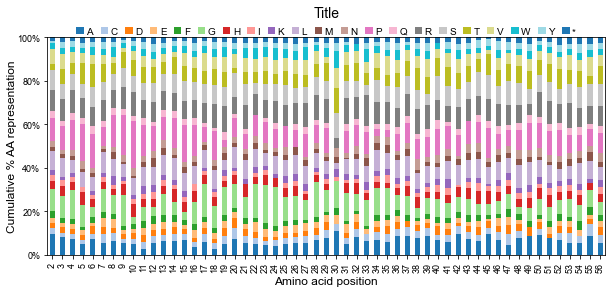

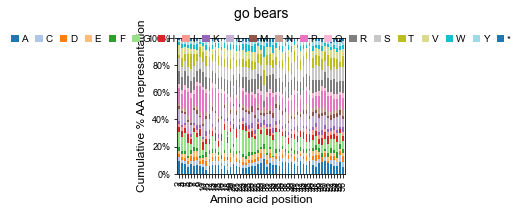

In [11]:
test_plot_library_representation()